In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm

In [7]:
def gen_sample(n, mus, sigmas):
    return np.array([mus + stats.norm.rvs(size = n, loc = 0, scale = sigmas[i]) for i in np.arange(len(sigmas)) ])

def gen_mus_sigma(nb_stateux, nb_samples):
    return (stats.uniform.rvs(size=nb_samples, loc=0, scale=200), stats.uniform.rvs(size=nb_stateux, loc=0, scale=40))

nb_stateux = 7
sample_length = 10

(mus, sigma) = gen_mus_sigma(nb_stateux, sample_length)
sample = gen_sample(sample_length, mus, sigma)
print len(sample), len(sample[0])
print mus
print sigma
print sample
print [np.mean([sample[i, j] for i in np.arange(len(sigma))]) for j in np.arange(len(mus))]


7 10
[ 191.42283697  194.29511184  148.2865133   115.12532464  178.85557777
   44.87638016   45.74593625    0.42718373  129.58038038  103.41067118]
[ 28.27798885  37.04627806  17.47303132  38.37541428  20.83062501
   1.50730344  22.88662528]
[[ 233.42946774  189.24242303   79.21615639   85.27058488  189.71669804
    55.29018216   62.7121011   -35.14190335  162.59762279  151.87497663]
 [ 133.83300483  206.20450811   96.75760273   75.52625408  159.42528083
    87.49338912   43.74149156   14.21508192  142.76467652   80.44483347]
 [ 197.09829355  207.81771685  135.5783742   126.9855452   176.20386646
    34.93889706   28.18819481    3.00931815  141.17182277  100.25077301]
 [ 234.08710718  182.37169906  142.0609842   191.95777016  230.93675195
    63.77581166  -45.6453298   -31.59876218  101.93663363  109.07787173]
 [ 214.43455525  205.51518432  122.13438203  120.93089344  146.03275525
    37.84743722   55.71642496   20.5890992   102.3707313    59.05413122]
 [ 194.06401931  191.83333291  14

In [8]:
#v_mus = np.array([pm.Uniform("mu%d" % i, lower=0, upper=200) for i in np.arange(sample_length)])
v_mus = np.array([pm.Normal("mu%d" % i, mu=0, tau=0.001) for i in np.arange(sample_length)])
v_sigmas = [pm.Uniform("sigma%d" % k, lower=0, upper=40) for k in np.arange(nb_stateux)]
v_taus = [pm.Lambda("tau%d" % k, lambda sigma=v_sigmas[k]: 1/sigma**2) for k in np.arange(nb_stateux)]

x = np.array([[pm.Normal("x%d_%d" % (k,i), mu=v_mus[i], tau=v_taus[k], 
                         observed=True, value=np.array(sample[k,i])) for i in np.arange(sample_length)]
              for k in np.arange(nb_stateux)])

print x.shape

(7L, 10L)


In [9]:
mcmc = pm.MCMC([v_mus, v_sigmas, v_taus, x])
mcmc.sample(20000,4000)

 [-----------------100%-----------------] 20000 of 20000 complete in 137.3 sec

185.904551104
182.830561639
126.585076114
112.99400584
165.968021162
52.9094746925
38.0593241485
1.71284665925
125.6328392
91.2549366451
[185.90455110395774, 182.83056163851737, 126.58507611418574, 112.99400583978456, 165.96802116220147, 52.909474692535618, 38.059324148493602, 1.7128466592534897, 125.63283919962204, 91.254936645122513]


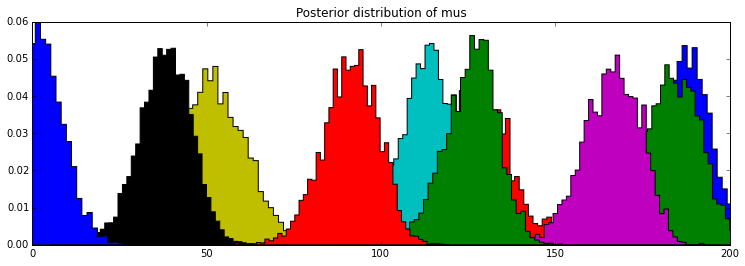

In [10]:
figsize(12.5, 4)
plt.title("Posterior distribution of mus")
for i in np.arange(sample_length):
    plt.hist(mcmc.trace("mu%d" % i)[:], bins=50, histtype="stepfilled", normed=True)
    plt.legend()
    plt.xlim((0,200))
    print (mcmc.trace("mu%d" % i)[:].mean())

print [mcmc.trace("mu%d" % j)[:].mean() for j in np.arange(sample_length)]

In [ ]:
x = np.array([[1,2], [1,3], [1,4]])
print x
y = np.array([10, 20, 30])
print y
print x+y.reshape(len(y), 1)
print type(x), len(x), x.shape